# 0. Data Loading

In [10]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [1]:
data = pd.read_excel("default of credit card clients.xls",header=1)

In [4]:
data['ID'].duplicated().value_counts()

False    30000
Name: ID, dtype: int64

ID 중복값은 없다, 삭제해도 괜찮음

In [5]:
data = data.drop('ID', axis=1)
data = data.rename(columns={"default payment next month":"default"})
data = data.rename(columns={"PAY_0":"PAY_1"})
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 24 columns]

In [6]:
data.shape

(30000, 24)

- **Feature Description**
    1. 기본정보
        - LIMIT_BAL(총 신용값?): Amount of given credit in NT dollars (includes individual and family/supplementary credit)
        - SEX: Gender (1=male, 2=female)
        - EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) #5,6은 뭐지 **5,6,0 unknown**
        - MARRIAGE: Marital status (1=married, 2=single, 3=others) **3=divorce, 0=unknown**
        - AGE: Age in years
    2. repayment(지불 지연)
        - PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
        - PAY_2: Repayment status in August, 2005 (scale same as above)
        - PAY_3: Repayment status in July, 2005 (scale same as above)
        - PAY_4: Repayment status in June, 2005 (scale same as above)
        - PAY_5: Repayment status in May, 2005 (scale same as above)
        - PAY_6: Repayment status in April, 2005 (scale same as above)
    3. bill(매달 날라오는 신용카드 청구서 금액)
    ***마이너스일땐 overpaid(정해진금액보다 더 낸 경우임. 예를들어, 자동이체를 걸어놨는데 두번 결제한 경우. 또는 환불을 받았을때)*** 신용 등급에 크게 지장을 주지 않는다. 실제로 target변수와의 corr도 낮은 값임.
    https://www.cnbc.com/select/what-does-negative-credit-card-balance-mean/
        - BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
        - BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
        - BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
        - BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
        - BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
        - BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    4. previous payment
    (Prior Payments means a payment of interest component of Loan Repayments made on or prior to the date of any Determination of Taxability, 대출상환의 이자 지불값?), (전달에 지불한 실제 금액)
        - PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
        - PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
        - PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
        - PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
        - PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
        - PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    5. target
        - default: Default payment (1=yes, 0=no) **(종속변수)**

In [122]:
condition = (data['BILL_AMT1']<=0)
data.loc[condition, ['BILL_AMT1']]

BILL_AMT1
9              0
18             0
19             0
26          -109
38             0
...          ...
29962       -264
29973          0
29979          0
29985          0
29998      -1645

[2598 rows x 1 columns]

In [123]:
data['PAY_AMT1']

0            0
1            0
2         1518
3         2000
4         2000
         ...  
29995     8500
29996     1837
29997        0
29998    85900
29999     2078
Name: PAY_AMT1, Length: 30000, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [8]:
data.isna().sum() 

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [9]:
data.describe().T

count           mean            std       min       25%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
default    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
LIMIT_BAL  140000.0  240000.00  1000000.0  
SEX             2.0       2.00        2.0  
EDUCATION       2.0       2.00        6.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_1           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
default         0.0       0.00        1.0

- 'BILL' 음수값 : Overpaid!
- 'BILL'과 'PAY_AMT'의 표준편차가 엄청나게 크다

# 1. EDA

## 1-1. 단일변수 파악

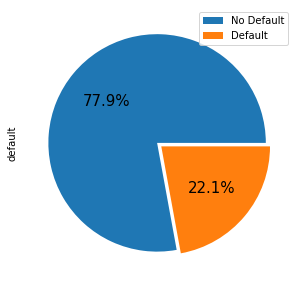

In [12]:
plt.figure(figsize=(7,5))

data['default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

- 약 1:3비율로 target변수 imblance 발생

In [16]:
#Checking number of unique rows in each feature

target = 'default'
features = [i for i in data.columns.values if i not in [target]]

nf = [] #numerical
cf = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'] #categorical

for i in features:
    if i in cf:
        pass
    else:
        nf.append(i)
    
print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 14 numerical & 9 categorical features.


                               Visualising Categorical Features:                                


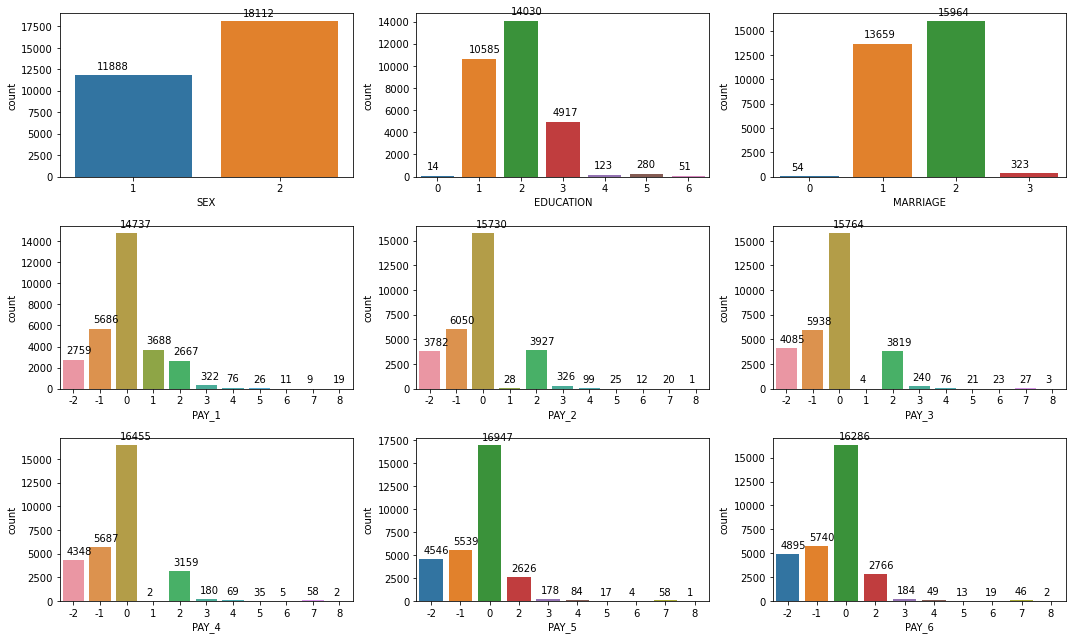

In [25]:
#Visualising the categorical features 
import matplotlib.pyplot as plt
import math

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if data[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        ax = sns.countplot(data[cf[i]])
        
        for p in ax.patches:
            ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+600))
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(data[cf[i]])
plt.tight_layout()
plt.show()

In [58]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

- 'EDUCATION' 범주 0 존재
- 5,6,0를 하나의 카테고리로 합치기

In [59]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

- 'MARRIAGE' 범주 0 존재
- 1 = married; 2 = single; 3 = divorce; 0=others

In [41]:
data['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

- 'PAY' 범주 -2,0 존재
- -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

                                     Features Distribution                                      


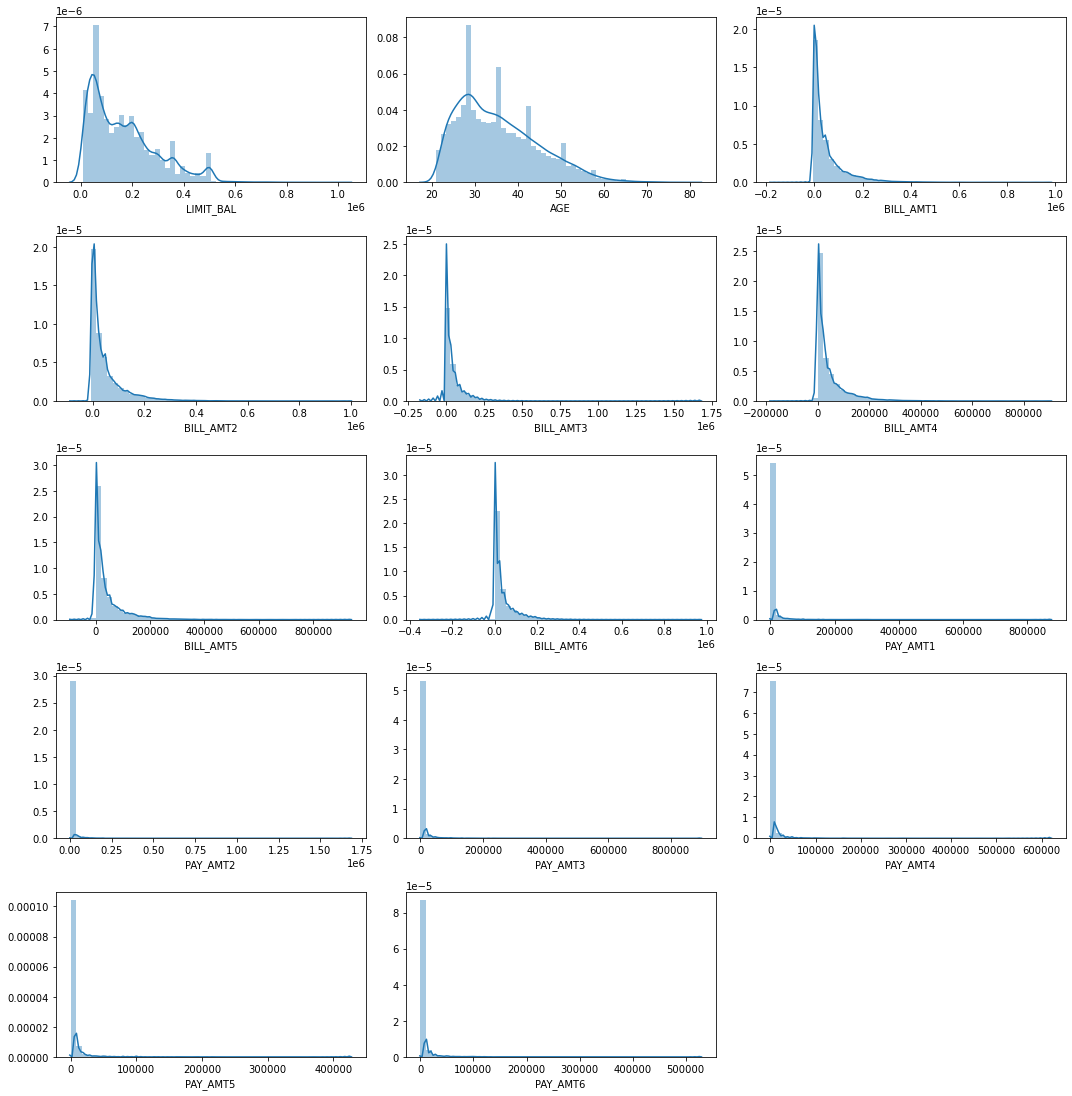

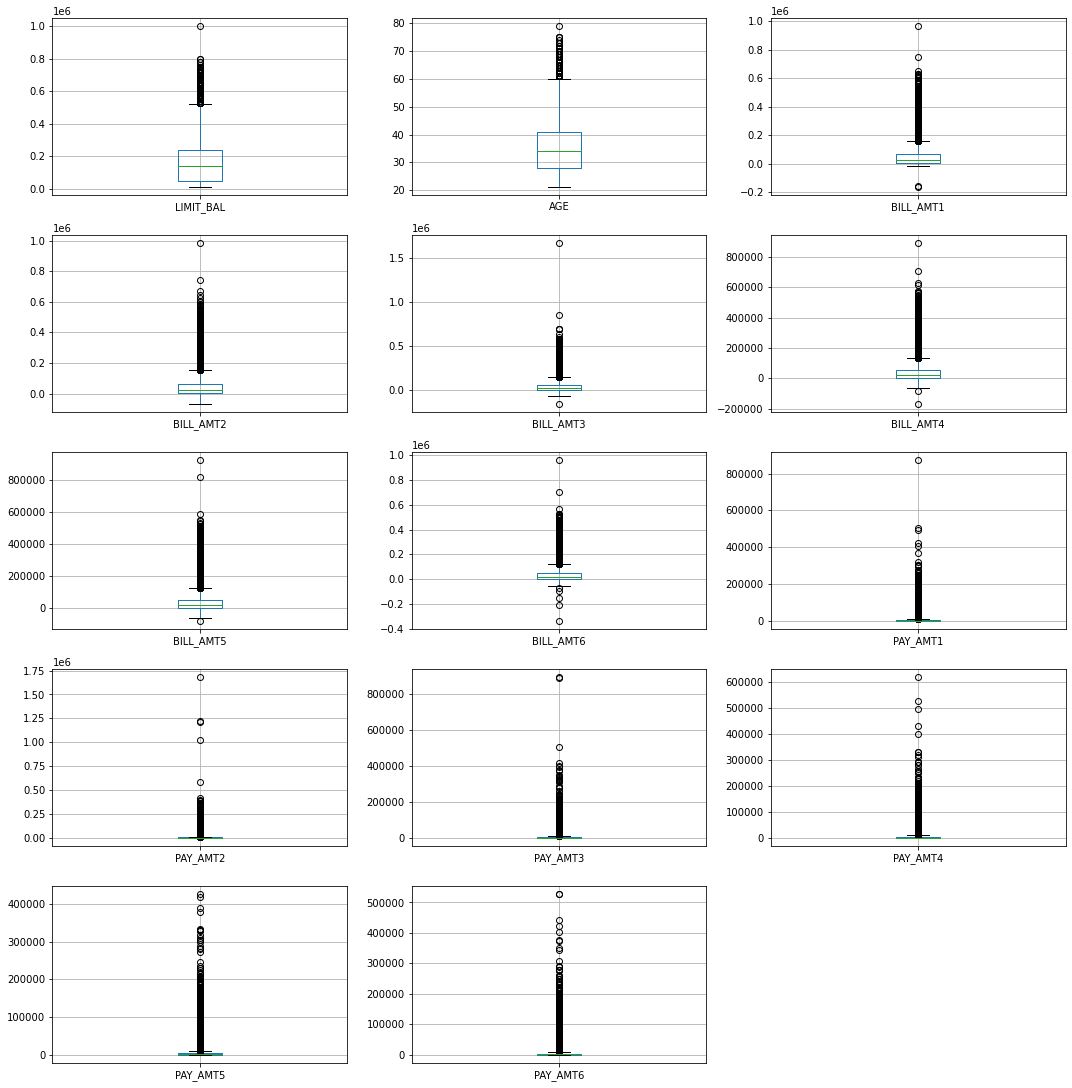

In [42]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()

변수 'LIMIT_BAL'과 'AGE'의 분포 모양이 왼쪽으로 치우쳐 있다 -> normalize 필요한가?

## 1-2. 종속변수와의 관계

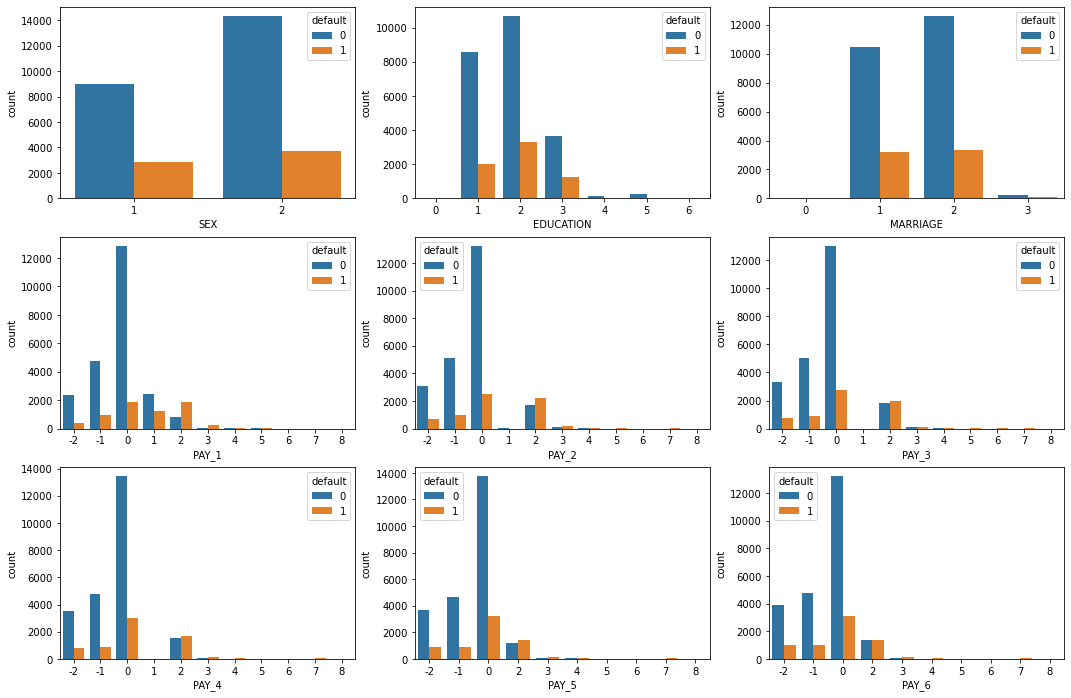

In [28]:
f, axes = plt.subplots(3,3, figsize=[18,4*math.ceil(len(cf)/n)])
axes = axes.flatten()                         
for col, ax in zip(cf, axes):
  sns.countplot(data = data, x=col, hue=target, ax=ax)
  #for p in axx.patches:
  #  axx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+600))
plt.show()

NOTE
- **'PAY'**변수를 살펴보면 cat 0이상부터(payment delay가 있는 사람들) default:1의 비율이 0의 비율보다 높다. → delay가 있으니까 default의 비율이 높아지는 것은 당연한듯.

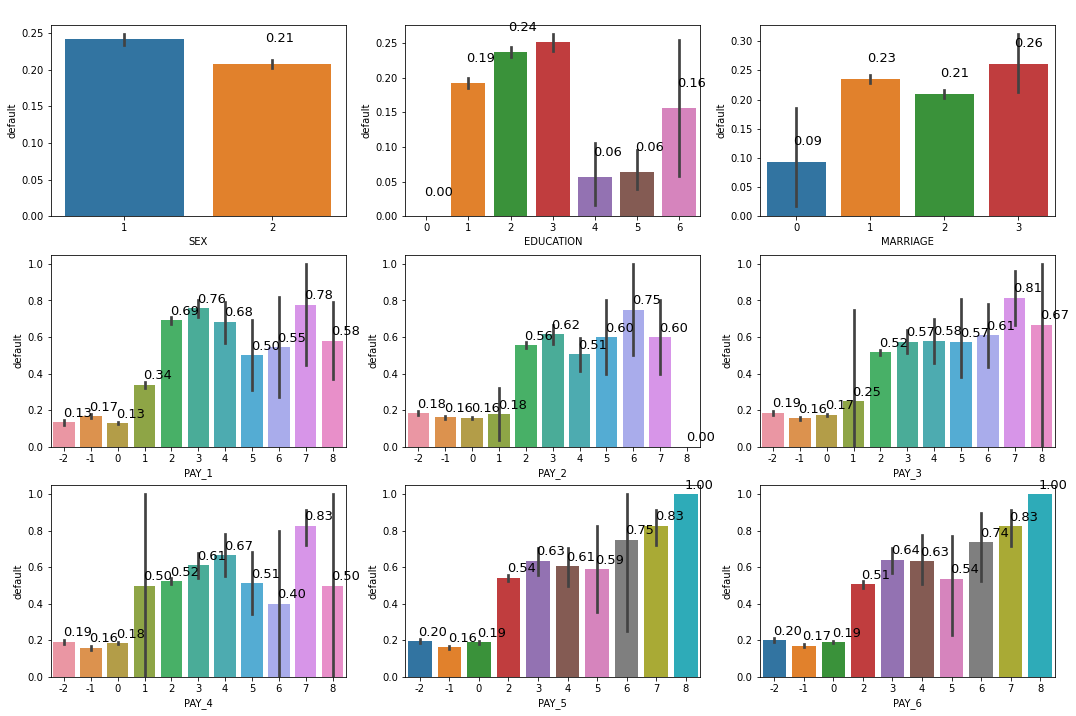

In [32]:
f, axes = plt.subplots(3,3, figsize=[18,4*math.ceil(len(cf)/n)])
axes = axes.flatten()                         
for col, ax in zip(cf, axes):
  axx = sns.barplot(data = data, x=col, y='default', ax=ax)
  for p in axx.patches:
     axx.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)
plt.show()

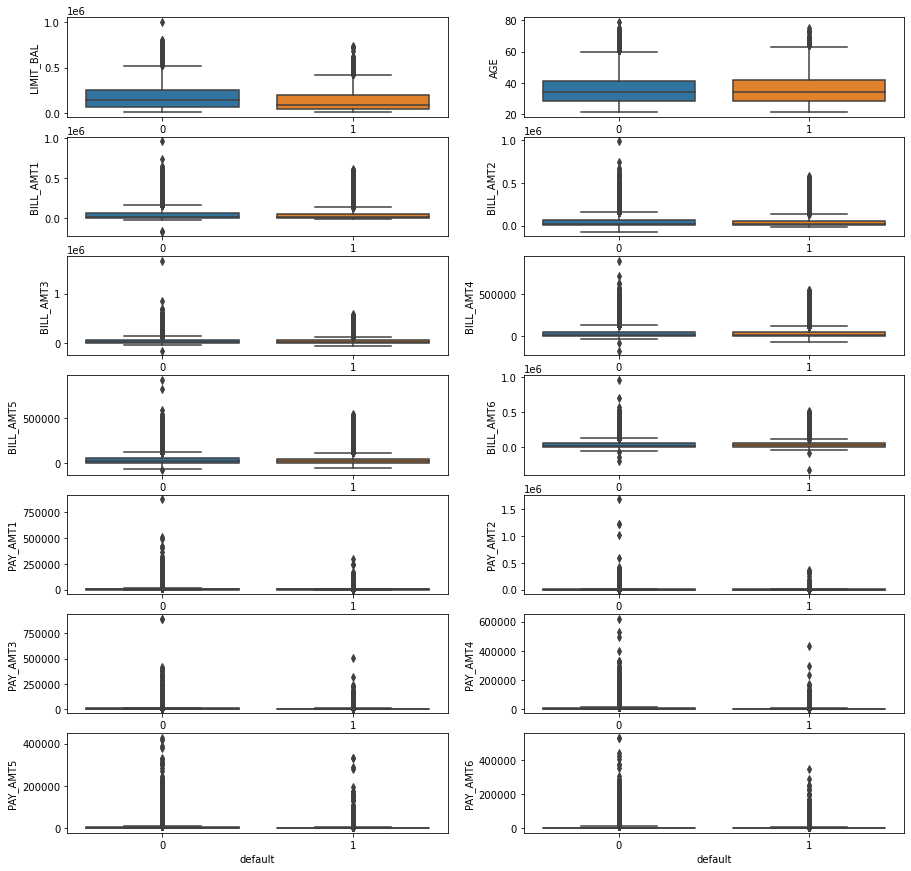

In [50]:
f, axes = plt.subplots(7,2, figsize=[15,5*math.ceil(len(cf)/n)])
axes = axes.flatten()                         
for col, ax in zip(nf, axes):
  sns.boxplot(data = data, x=target, y=col, ax=ax) #showfliers=False : 설정시, 이상치 제거하고 그려줌
plt.show()

In [ ]:
f, axes = plt.subplots(7,2, figsize=[15,5*math.ceil(len(cf)/n)])
axes = axes.flatten()                         
for col, ax in zip(nf, axes):
  sns.boxplot(data = data, x=target, y=col, ax=ax) #showfliers=False : 설정시, 이상치 제거하고 그려줌
plt.show()

## 1-3. 변수들간의 관계

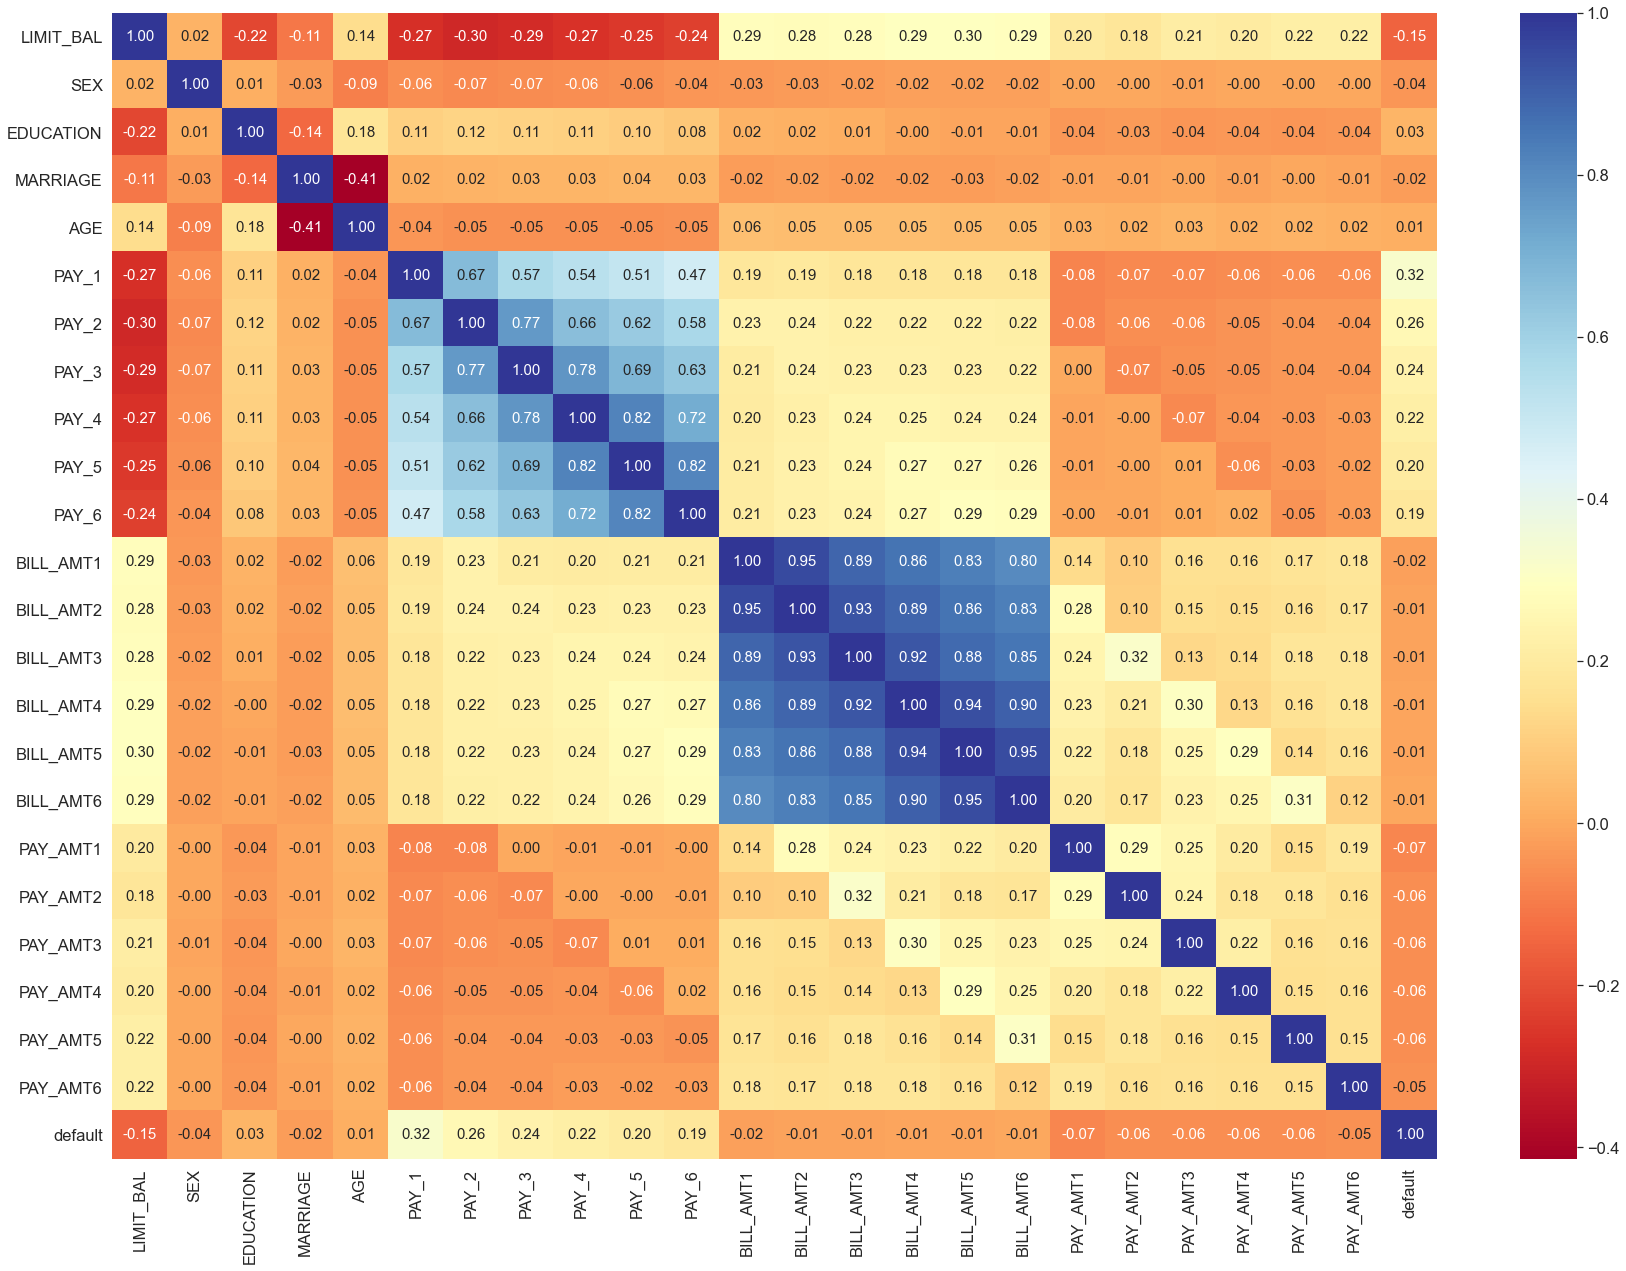

In [56]:
# heatmap (seaborn)
fig = plt.figure(figsize = (25, 18))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(data[features].corr(), annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = features, xticklabels = features, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

- 'PAY', 'BILL', 'PAY_AMT' 변수를 묶어버릴순 없나?, 어차피 default와의 corr는 그룹별로 비슷한 값을 가짐
- 성질이 비슷한 변수들이 그룹지어 다중공선성 위험을 높힌다

# 2. Preprocessing

- 범주형 바꿔주기
- 스케일링(연속형)
- 데이터 불균형

## 2-1. 범주형 변수 범주 변경

In [65]:
#EDUCATION 범주 바꿔주기
condition = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[condition, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [66]:
#MARRIAGE 범주 바꿔주기
condition = (data.MARRIAGE == 0)
data.loc[condition, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [69]:
#PAY 범주 바꿔주기
condition = (data.PAY_1 == -2) | (data.PAY_1 == -1) | (data.PAY_1 == 0)
data.loc[condition, 'PAY_1'] = 0
condition = (data.PAY_2 == -2) | (data.PAY_2 == -1) | (data.PAY_2 == 0)
data.loc[condition, 'PAY_2'] = 0
condition = (data.PAY_3 == -2) | (data.PAY_3 == -1) | (data.PAY_3 == 0)
data.loc[condition, 'PAY_3'] = 0
condition = (data.PAY_4 == -2) | (data.PAY_4 == -1) | (data.PAY_4 == 0)
data.loc[condition, 'PAY_4'] = 0
condition = (data.PAY_5 == -2) | (data.PAY_5 == -1) | (data.PAY_5 == 0)
data.loc[condition, 'PAY_5'] = 0
condition = (data.PAY_6 == -2) | (data.PAY_6 == -1) | (data.PAY_6 == 0)
data.loc[condition, 'PAY_6'] = 0

PAY 변수 경우에 명시되지 않은 -2와 0으로 코딩된 값들이 많기 때문에 payment delay를 하지 않은 사람으로 추정함. 따라서 0으로 코딩

                               Visualising Categorical Features:                                


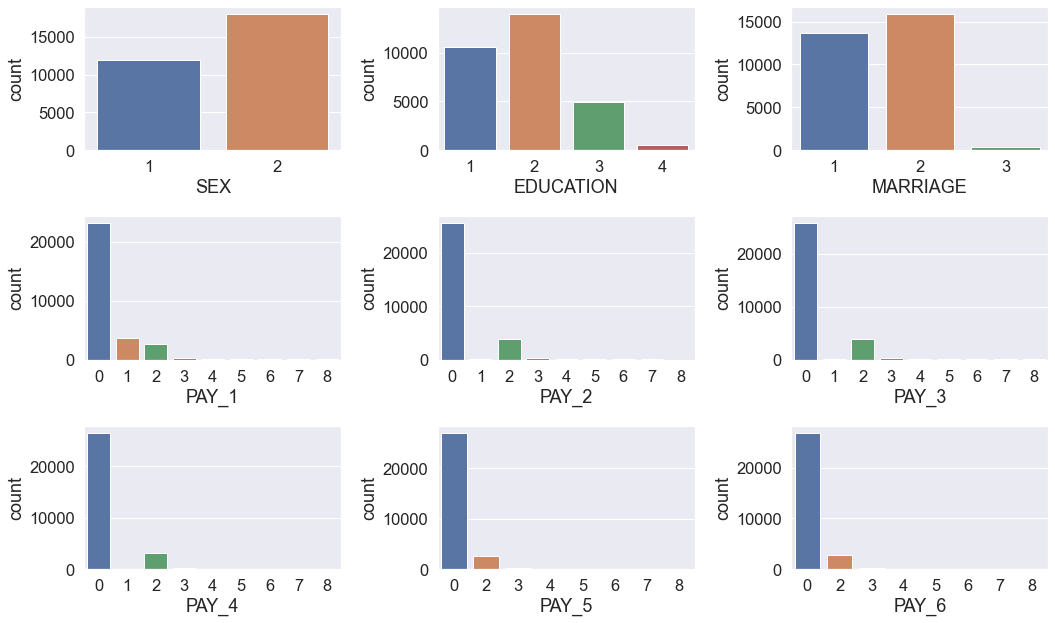

In [70]:
#Visualising the categorical features 
import matplotlib.pyplot as plt
import math

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if data[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(data[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(data[cf[i]])
plt.tight_layout()
plt.show()

'PAY'변수를 delay 여부에 따라서 0,1로 코딩하는것이 더 효율적일 것 같다!

In [71]:
#PAY 범주 바꿔주기
condition = (data.PAY_1 != 0)
data.loc[condition, 'PAY_1'] = 1
condition = (data.PAY_2 != 0)
data.loc[condition, 'PAY_2'] = 1
condition = (data.PAY_3 != 0)
data.loc[condition, 'PAY_3'] = 1
condition = (data.PAY_4 != 0)
data.loc[condition, 'PAY_4'] = 1
condition = (data.PAY_5 != 0)
data.loc[condition, 'PAY_5'] = 1
condition = (data.PAY_6 != 0)
data.loc[condition, 'PAY_6'] = 1

                               Visualising Categorical Features:                                


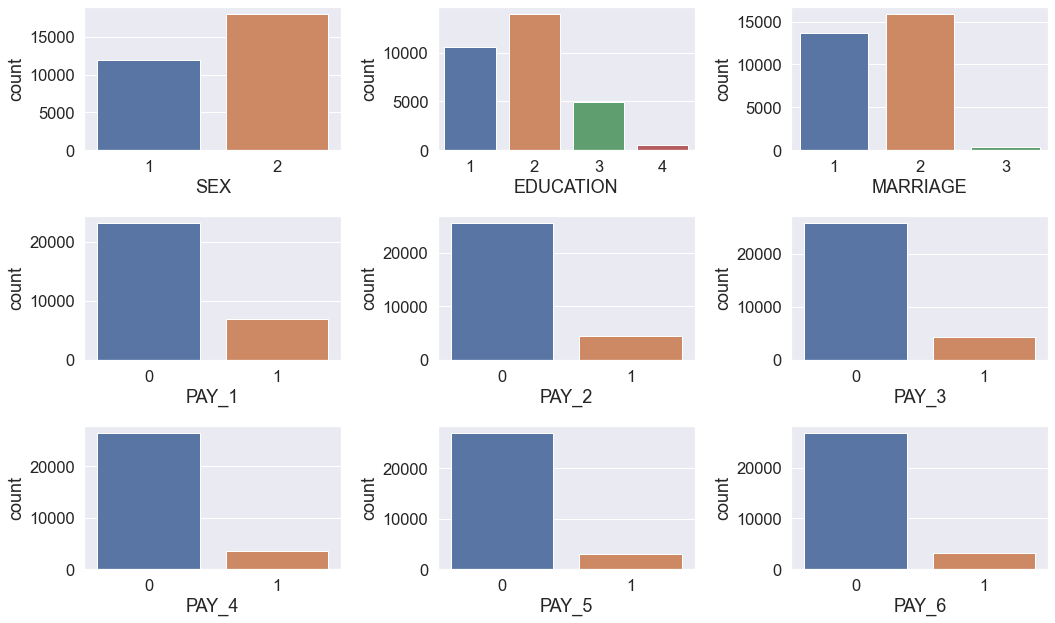

In [72]:
#Visualising the categorical features 
import matplotlib.pyplot as plt
import math

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if data[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(data[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(data[cf[i]])
plt.tight_layout()
plt.show()

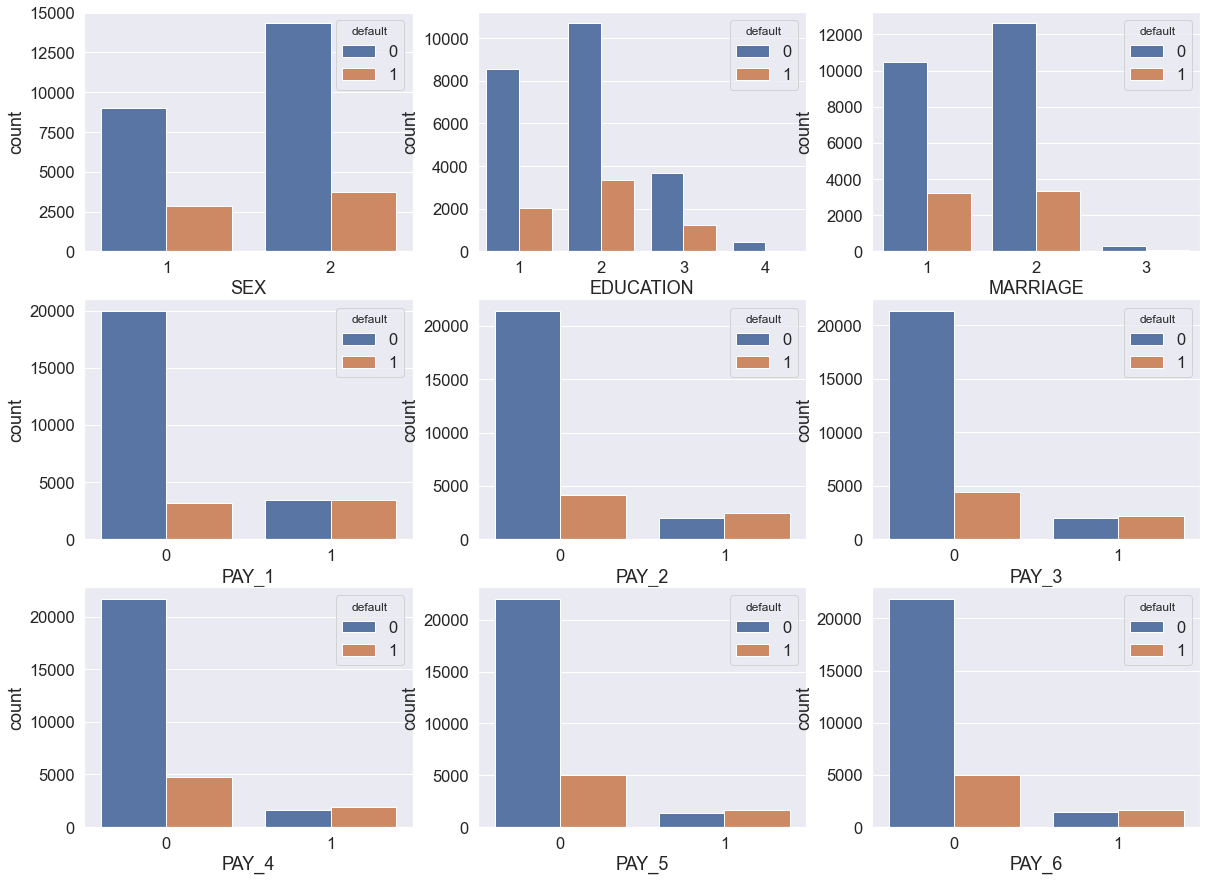

In [80]:
f, axes = plt.subplots(3,3, figsize=[20,5*math.ceil(len(cf)/n)])
axes = axes.flatten()                         
for col, ax in zip(cf, axes):
  sns.countplot(data = data, x=col, hue=target, ax=ax)
plt.show()

PAY변수 대부분이 payment delay가 있는 사람이 미납인 경우가 더 높다

## 2-2. 연속형 변수 표준화

In [90]:
std_list=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [91]:
std_list_data=data[std_list]
no_std_list_data=data.drop(std_list,axis=1)

In [95]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(std_list_data)
scaled_data = std_scaler.transform(std_list_data)

In [97]:
#Dataframe으로 변환
scaled_data=pd.DataFrame(scaled_data,columns=std_list)

In [98]:
scaled_data

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0      -0.642501  -0.647399  -0.667993  -0.672497  -0.663059  -0.652724   
1      -0.659219  -0.666747  -0.639254  -0.621636  -0.606229  -0.597966   
2      -0.298560  -0.493899  -0.482408  -0.449730  -0.417188  -0.391630   
3      -0.057491  -0.013293   0.032846  -0.232373  -0.186729  -0.156579   
4      -0.578618  -0.611318  -0.161189  -0.346997  -0.348137  -0.331482   
...          ...        ...        ...        ...        ...        ...   
29995   1.870379   2.018136   2.326690   0.695474  -0.149259  -0.384392   
29996  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691  -0.652724   
29997  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517  -0.327687   
29998  -0.717982   0.410269   0.422373   0.147844  -0.468063   0.169130   
29999  -0.044739  -0.003851   0.039667  -0.104582  -0.129669  -0.395592   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0     -0.341942 -0.227086 -0.296801 -0.308063 -0.314136 -0.293382  
1     -0.341942 -0.213588 -0.240005 -0.244230 -0.314136 -0.180878  
2     -0.250292 -0.191887 -0.240005 -0.244230 -0.248683 -0.012122  
3     -0.221191 -0.169361 -0.228645 -0.237846 -0.244166 -0.237130  
4     -0.221191  1.335034  0.271165  0.266434 -0.269039 -0.255187  
...         ...       ...       ...       ...       ...       ...  
29995  0.171250  0.611048 -0.012648 -0.113564  0.013131 -0.237130  
29996 -0.231032 -0.103955  0.214255 -0.299828 -0.314136 -0.293382  
29997 -0.341942 -0.256990  0.952725 -0.039964 -0.183229 -0.119001  
29998  4.844316 -0.109033 -0.229895 -0.185120  3.152536 -0.191904  
29999 -0.216481 -0.178866 -0.215582 -0.244230 -0.248683 -0.237130  

[30000 rows x 12 columns]

In [100]:
#merge
pd.merge(no_std_list_data,scaled_data,left_index=True, right_index=True)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      1      1      0      0   
1         120000    2          2         2   26      0      1      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43      0      0      0      0   
29997      30000    1          2         2   37      1      1      1      0   
29998      80000    1          3         1   41      1      0      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0          0  ...  -0.667993  -0.672497  -0.663059  -0.652724 -0.341942   
1          0  ...  -0.639254  -0.621636  -0.606229  -0.597966 -0.341942   
2          0  ...  -0.482408  -0.449730  -0.417188  -0.391630 -0.250292   
3          0  ...   0.032846  -0.232373  -0.186729  -0.156579 -0.221191   
4          0  ...  -0.161189  -0.346997  -0.348137  -0.331482 -0.221191   
...      ...  ...        ...        ...        ...        ...       ...   
29995      0  ...   2.326690   0.695474  -0.149259  -0.384392  0.171250   
29996      0  ...  -0.627430  -0.532924  -0.577691  -0.652724 -0.231032   
29997      0  ...  -0.638158  -0.347961  -0.324517  -0.327687 -0.341942   
29998      0  ...   0.422373   0.147844  -0.468063   0.169130  4.844316   
29999      0  ...   0.039667  -0.104582  -0.129669  -0.395592 -0.216481   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0     -0.227086 -0.296801 -0.308063 -0.314136 -0.293382  
1     -0.213588 -0.240005 -0.244230 -0.314136 -0.180878  
2     -0.191887 -0.240005 -0.244230 -0.248683 -0.012122  
3     -0.169361 -0.228645 -0.237846 -0.244166 -0.237130  
4      1.335034  0.271165  0.266434 -0.269039 -0.255187  
...         ...       ...       ...       ...       ...  
29995  0.611048 -0.012648 -0.113564  0.013131 -0.237130  
29996 -0.103955  0.214255 -0.299828 -0.314136 -0.293382  
29997 -0.256990  0.952725 -0.039964 -0.183229 -0.119001  
29998 -0.109033 -0.229895 -0.185120  3.152536 -0.191904  
29999 -0.178866 -0.215582 -0.244230 -0.248683 -0.237130  

[30000 rows x 24 columns]

In [102]:
scaled_all_data=pd.merge(no_std_list_data,scaled_data,left_index=True, right_index=True)

## 2-4. 연속형 변수 정규화

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normal_data = scaler.fit_transform(std_list_data)

In [109]:
#Dataframe으로 변환
normal_data=pd.DataFrame(normal_data,columns=std_list)

In [110]:
normal_data

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0       0.149982   0.069164   0.086723   0.160138   0.080648   0.260979   
1       0.148892   0.067858   0.087817   0.163220   0.084074   0.263485   
2       0.172392   0.079532   0.093789   0.173637   0.095470   0.272928   
3       0.188100   0.111995   0.113407   0.186809   0.109363   0.283685   
4       0.154144   0.071601   0.106020   0.179863   0.099633   0.275681   
...          ...        ...        ...        ...        ...        ...   
29995   0.313716   0.249208   0.200746   0.243036   0.111622   0.273259   
29996   0.148008   0.067955   0.088267   0.168596   0.085794   0.260979   
29997   0.149674   0.069405   0.087859   0.179805   0.101057   0.275854   
29998   0.145064   0.140604   0.128239   0.209850   0.092403   0.298591   
29999   0.188931   0.112633   0.113667   0.194553   0.112803   0.272746   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      0.000000  0.000409  0.000000  0.000000  0.000000  0.000000  
1      0.000000  0.000594  0.001116  0.001610  0.000000  0.003783  
2      0.001738  0.000891  0.001116  0.001610  0.002345  0.009458  
3      0.002290  0.001199  0.001339  0.001771  0.002506  0.001892  
4      0.002290  0.021779  0.011160  0.014493  0.001615  0.001284  
...         ...       ...       ...       ...       ...       ...  
29995  0.009730  0.011875  0.005583  0.004907  0.011723  0.001892  
29996  0.002103  0.002094  0.010042  0.000208  0.000000  0.000000  
29997  0.000000  0.000000  0.024552  0.006763  0.004689  0.005864  
29998  0.098334  0.002024  0.001315  0.003101  0.124174  0.003412  
29999  0.002379  0.001069  0.001596  0.001610  0.002345  0.001892  

[30000 rows x 12 columns]

In [111]:
#merge
normal_all_data=pd.merge(no_std_list_data,normal_data,left_index=True, right_index=True)

# 3. Logistic Regression

## std data

In [103]:
from sklearn.model_selection import train_test_split

X = scaled_all_data.drop('default',axis=1)
y = scaled_all_data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=777)

print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (30000, 23) (30000,) 
Training set  --->  (24000, 23) (24000,) 
Testing set   --->  (6000, 23)  (6000,)


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,y_pred))

accuracy: 0.79
precision: 0.00
recall: 0.00
F1: 0.00
AUC Score: 0.5


C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## normal data

In [112]:
from sklearn.model_selection import train_test_split

X = normal_all_data.drop('default',axis=1)
y = normal_all_data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=777)

print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (30000, 23) (30000,) 
Training set  --->  (24000, 23) (24000,) 
Testing set   --->  (6000, 23)  (6000,)


In [113]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,y_pred))

accuracy: 0.79
precision: 0.00
recall: 0.00
F1: 0.00
AUC Score: 0.5


C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Data Balancing

## std data

In [105]:
# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=11)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [106]:
X_train_over.shape, y_train_over.shape

((37296, 23), (37296,))

In [107]:
lr2 = LogisticRegression()
lr2.fit(X_train_over, y_train_over)
y_pred = lr2.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,y_pred))

accuracy: 0.79
precision: 0.00
recall: 0.00
F1: 0.00
AUC Score: 0.5


C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## normal data

In [114]:
# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=11)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [115]:
X_train_over.shape, y_train_over.shape

((37296, 23), (37296,))

In [116]:
lr2 = LogisticRegression()
lr2.fit(X_train_over, y_train_over)
y_pred = lr2.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,y_pred))

accuracy: 0.79
precision: 0.00
recall: 0.00
F1: 0.00
AUC Score: 0.5


C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


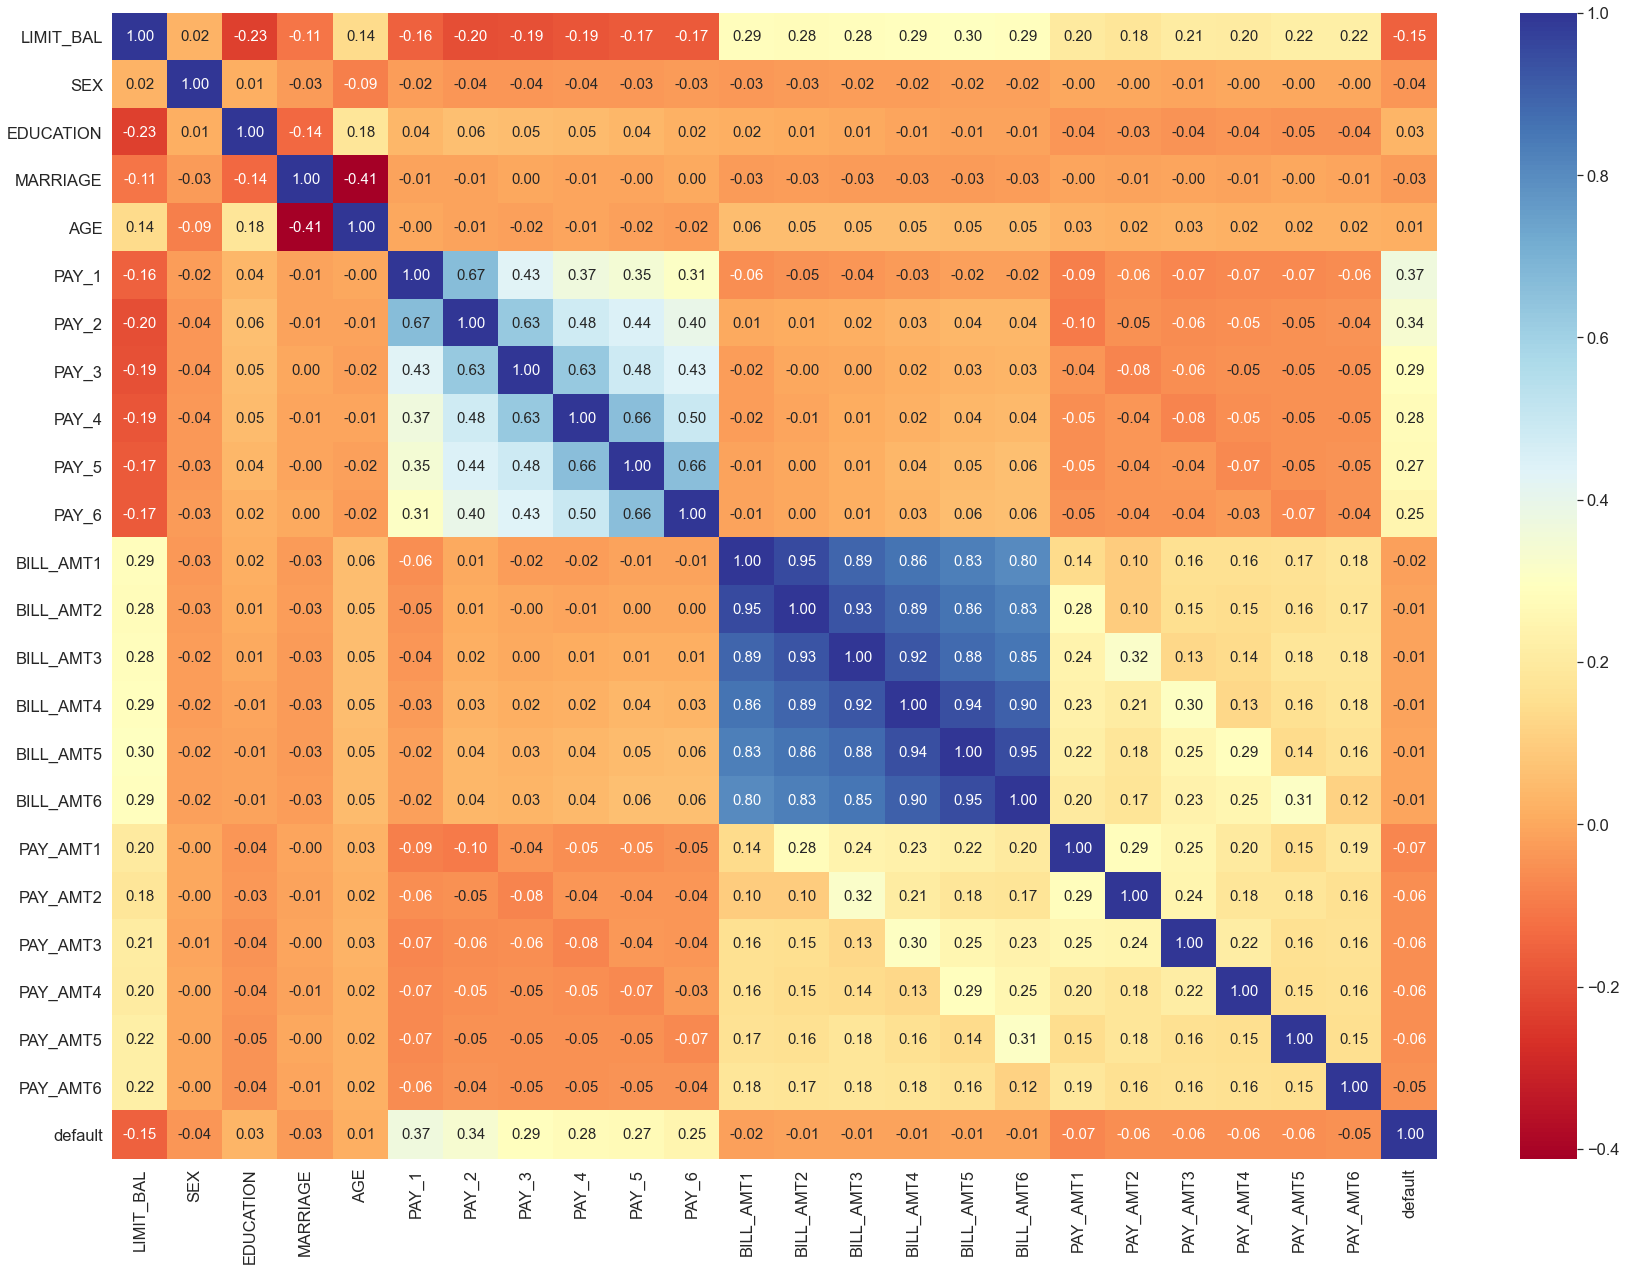

In [117]:
# heatmap (seaborn)
fig = plt.figure(figsize = (25, 18))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(data[features].corr(), annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = features, xticklabels = features, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

# 데이터 특징 및 이슈
- **target변수(default)**가 1:3으로 **imbalance** (1:non-defaulter, 3:defaulter) -> over/downsampling 필요
- 'BILL_AMT'의 기술통계량을 확인하면 음수값이 있음. 변수가 무엇을 의미하는지 파악한 후에 다시 조사해야함
- 'BILL_AMT'와 'PAY_AMT'의 **표준편차가 엄청나게 크다** -> scaling 고려
- **범주형 변수에서 코드북에 명시되지 않은 범주 발견**
    1. 'EDUCATION' (1~6)  : 범주 0 발견
    2. 'MARRIAGE' (1~3) : 범주 0 발견
    3. 'PAY_n' (-1,1~7) : 범주 -2,0 발견
    
    →이 세가지는 범주를 변환하는 작업 필요할듯
    

- **연속형 변수의 분포 이상** : 변수 'LIMIT_BAL'과 'AGE'의 분포 모양이 왼쪽으로 치우쳐 있다 -> 자료를 찾아보니 AGE같은 인적 정보는 정규화를 시키지 않고 categorical 변환작업 함. (ex. 10대 20대 etc.)
- **Multicollinearity** : vif를 계산한것은 아니지만 모든 변수에 대한 corr을 살펴보면 ***'PAY','BILL_AMT','PAY_AMT' 변수들이 서로서로 그룹지어서 높은 상관계수***를 나타내고 있음. 그룹별로 묶던지 해서 처리를 해줘야할듯. (어차피 default와의 corr는 그룹별로 비슷한 값을 가짐)